## 0. Import package

In [1]:
import numpy as np
# 신경망 구현에는 오직 numpy만 사용하며,

from PIL import Image
import os
import matplotlib.pyplot as plt
# 위 패키지는 이미지 입력, 결과 플로팅을 위해 import한다.
# Image, os는 "1.read data"에서  jpg image를 입력받을 때 사용하며
# plt는 "7.result"에서 결과 플로팅에 사용한다.

# 1. read data

In [2]:
# 420개의 16*16 크기의 jpg 학습 데이터셋을 읽을 때 사용하는 함수
# (420개 데이터 각각의 shape을 출력)  
def read_train_dataset(file):
    X = []
    for i in range(1,421):
        image_path = os.path.join(file, f"{i}.jpg")
        img = Image.open(image_path)
        img_array = np.array(img)
        X.append(img_array)
        print(i, np.array(img_array).shape)
    
    X = np.array(X)
    return X

# 20개의 16*16 크기의 jpg 테스트 데이터셋을 읽을 때 사용하는 함수
# (20개 데이터 각각의 shape을 출력)
def read_test_dataset(file):
    X = []
    for i in range(1,21):
        image_path = os.path.join(file, f"test{i}.jpg")
        img = Image.open(image_path)
        img_array = np.array(img)
        X.append(img_array)
        print("test case", i, ")", np.array(img_array).shape)  
    
    X = np.array(X)
    return X

# 420개의   학습 jpg 데이터셋에 대한 label이 저장된 csv파일을 읽는 함수
#  20개의 테스트 jpg 데이터셋에 대한 label이 저장된 csv파일을 읽는 함수
def read_label(file_path):

# 파일 열기 및 데이터 읽기
    with open(file_path, 'r', encoding='utf-8-sig') as file:
        csv_string = file.read()

    csv_string = csv_string.lstrip('\ufeff').replace('"', '')
    # 쉼표로 문자열을 분할하고 각 값을 정수로 변환하여 리스트에 저장
    values = [int(x) for x in csv_string.split(',')]

    # 리스트를 넘파이 어레이로 변환
    Y = np.array(values)
    return Y


# 기본적인 하이퍼파라미터 값을 정의한다.
train_size = 380        # 입력 데이터셋 420개 중, 380개의 데이터셋을 학습에 사용한다.
test_size = 20          # 20개의 데이터셋을 테스트에 사용한다.

input_size = 16*16      # num of input  layer 뉴런 = 256, 
hidden_neurons = 128    # num of hidden layer 뉴런 = 128,
output_neurons = 7      # num of output layer 뉴런 = 7  



# 학습데이터 경로를 입력, 데이터의 np.array인 값을 반환
X = read_train_dataset('train_dataset/')
# 학습레이블 경로를 입력, 레이블의 np.array인 값을 반환
Y = read_label("train_label.csv")
# 테스트데이터 경로를 입력, 데이터의 np.array인 값을 반환
X_test = read_test_dataset('test_dataset/')
# 테스트레이블 경로를 입력, 레이블의 np.array인 값을 반환
Y_test = read_label("test_label.csv")


print("X, Y shape :", X.shape, Y.shape)
print("X_test, Y_test shape :", X_test.shape, Y_test.shape)

# X, Y shape : (420, 16, 16) (420,)
# X_test, Y_test shape : (20, 16, 16) (20,)

1 (16, 16)
2 (16, 16)
3 (16, 16)
4 (16, 16)
5 (16, 16)
6 (16, 16)
7 (16, 16)
8 (16, 16)
9 (16, 16)
10 (16, 16)
11 (16, 16)
12 (16, 16)
13 (16, 16)
14 (16, 16)
15 (16, 16)
16 (16, 16)
17 (16, 16)
18 (16, 16)
19 (16, 16)
20 (16, 16)
21 (16, 16)
22 (16, 16)
23 (16, 16)
24 (16, 16)
25 (16, 16)
26 (16, 16)
27 (16, 16)
28 (16, 16)
29 (16, 16)
30 (16, 16)
31 (16, 16)
32 (16, 16)
33 (16, 16)
34 (16, 16)
35 (16, 16)
36 (16, 16)
37 (16, 16)
38 (16, 16)
39 (16, 16)
40 (16, 16)
41 (16, 16)
42 (16, 16)
43 (16, 16)
44 (16, 16)
45 (16, 16)
46 (16, 16)
47 (16, 16)
48 (16, 16)
49 (16, 16)
50 (16, 16)
51 (16, 16)
52 (16, 16)
53 (16, 16)
54 (16, 16)
55 (16, 16)
56 (16, 16)
57 (16, 16)
58 (16, 16)
59 (16, 16)
60 (16, 16)
61 (16, 16)
62 (16, 16)
63 (16, 16)
64 (16, 16)
65 (16, 16)
66 (16, 16)
67 (16, 16)
68 (16, 16)
69 (16, 16)
70 (16, 16)
71 (16, 16)
72 (16, 16)
73 (16, 16)
74 (16, 16)
75 (16, 16)
76 (16, 16)
77 (16, 16)
78 (16, 16)
79 (16, 16)
80 (16, 16)
81 (16, 16)
82 (16, 16)
83 (16, 16)
84 (16, 16)
8

## 2. Train / Validation split

###### 420개의 데이터를 380개의 학습데이터, 40개의 validation데이터로 나눈다.
###### 420개를 모두 학습에 사용하면, 420개 데이터에만 적합한 '오버피팅'이 발생할 수 있다.
###### 40개의 validation데이터를 통해 학습 후에, 하이퍼 파라미터를 조정할 수 있다.

In [3]:
# 0~419 사이의 값을 랜덤으로 배치한다.
rand = np.arange(420)
np.random.shuffle(rand)


# Train (rand값을 380개 선택하여 해당 데이터를 학습데이터의 인덱스로 사용)
train_no = rand[:380]
# Validation (rand값을 40개 선택하여 해당 데이터를 validation데이터의 인덱스로 사용)
val_no=np.setdiff1d(rand, train_no)

In [4]:
# 위에서 구한 random index를 적용한다.
X_train, X_val = X[train_no,:,:], X[val_no,:,:]
Y_train, Y_val = Y[train_no], Y[val_no]

print("X_train, X_val shape :", X_train.shape, X_val.shape)
# X_train, X_val shape : (380, 16, 16) (40, 16, 16)

X_train, X_val shape : (380, 16, 16) (40, 16, 16)


## 3. define function
### (sigmoid, softmax, initialization)
###### Activation 함수로 sigmoid, softmax를 정의하고
###### 초기 weight값을 설정하기 위한 init 함수를 정의한다.

In [5]:
# (Sigmoid and its derivative)
def sigmoid(z):
  return 1 / (np.exp(-z)+1)
def d_sigmoid(z):
  return (np.exp(-z)) / ((np.exp(-z)+1)**2)


# (Softmax and its derivative)
def softmax(a):
  exp_element=np.exp(a-a.max())
  return exp_element/np.sum(exp_element,axis=0)
def d_softmax(a):
  exp_element=np.exp(a-a.max())
  return exp_element/np.sum(exp_element,axis=0)*(1-exp_element/np.sum(exp_element,axis=0))


# (Initializing weights)
def init(x,y):
  layer = np.random.uniform(-1.,1.,size=(x,y))/np.sqrt(x*y)
  return layer.astype(np.float32)
np.random.seed(42)

# input layer와 hidden layer 사이의 가중치 w1, 
# hidden layer와 output layer 사이의 가중치 w2를 무작위 생성한다. (-1과 1 사이값)
w1 = init(16*16, 128)                 # weight 1의 shape = (256,128)
w2 = init(128, output_neurons)        # weight 2의 shape = (128,64)

## 4. forward and backward pass

##### 순전파, 역전파 과정 함수를 정의한다.
데이터와 label을 입력받아
1. 타겟값을 만들고

2. Z = Wx 의 선형연산
3. A = Activation(Z) 비선형연산을 적용한다.
4. 2,3 과정을 반복한다.

5. 출력값과 target값과의 비교를 통해 오차를 계산한다. (batch값으로 나눠 정규화)
6. w2에 대한 그래디언트 d_w2를 계산한다. 
7. hidden layer의 출력값과 target값과의 비교를 통해 오차를 계산한다. (batch값으로 나눠 정규화)
6. w1에 대한 그래디언트 d_w1를 계산한다.

7. 순전파 출력값, 그래디언트 값을 반환한다.

In [6]:
def forward_backward_pass(x,y): # (128,256) (128, )
  targets = np.zeros((len(y),7), np.float32)  # (128,7)
  #print("targets:", targets.shape)  (128 7)
  #print(y)
  targets[range(targets.shape[0]),y] = 1
  
  # forward pass
  z1 = x.dot(w1)      # (128,128) = (128,256) (256,128)
  a1 = sigmoid(z1)    # a1.shape = z1.shape  
  z2 = a1.dot(w2)     # (128 7) = (128 128) (128 7)  
  out  = softmax(z2)  # z1.shape = out.shape     

  # backpropagation
  error = 2*(out-targets)/out.shape[0]*d_softmax(z2)
  d_w2 = a1.T@error                             # dw2 = (1/m) * dz2 * a1T
  # error, d_w2 shape : (128 7), (128 10) <128 is batch size>

  error = ((w2).dot(error.T)).T*d_sigmoid(z1)   
  d_w1 = x.T@error                              # dw1 = (1/m) * dz1 * xT
  #error, d_w1 shape : (128 128), (784 128) <128 is batch size>

  return out, d_w1, d_w2 

## 5. Training

1. 128크기의 배치로 한 epoch에 128개의 사진을 사용하여 벡터화하여 한 번에 처리한다. (batch = 128)
2. 순전파, 역전파 과정
3. 그래디언트 업데이트 (lr=0.001)
4. 1 2 3을 epochs만큼 반복한다. (epochs=18000)

In [7]:
epochs = 18000  # num of epochs
lr = 0.001      # Learning Rate
batch = 128     # batch size

losses,accuries,val_accuracies=[],[],[]   # loss, accurcy를 저장

for i in range(epochs):
    # randomize and create batches
    # (380개의 학습데이터 중 128개를 랜덤으로 골라 순,역전파 시키기 위해 x,y 추출)
    sample=np.random.randint(0,X_train.shape[0],size=(batch))
    x = X_train[sample].reshape((-1, 16*16))
    y = Y_train[sample]
    # x y shape : (128,256) (128,)


    out, d_w1, d_w2 = forward_backward_pass(x,y)   


    # accuracy, loss의 평균을 위 리스트에 추가
    category = np.argmax(out, axis=1)
    
    accuracy = (category==y).mean()
    accuries.append(accuracy.item())
    
    loss = ((category-y)**2).mean()   # 제곱오차의 평균
    losses.append(loss.item())
    
    # SGD (경사하강법 W = W-a*dW, 업데이트)
    w1 = w1-lr*d_w1 
    w2 = w2-lr*d_w2
    


    # 20 epoch마다 40개의 validation data의 accuarcy를 계산한다.  
    if(i%20==0):    
      X_val = X_val.reshape((-1, 16*16))
      val_out = np.argmax(softmax(sigmoid(X_val.dot(w1)).dot(w2)), axis=1)
      val_acc = (val_out==Y_val).mean()
      val_accuracies.append(val_acc.item())
    if(i%1000==0): print(f'For {i}th epoch ) train loss: {loss:.3f} train acc: {accuracy:.3f} | validation accuracy:{val_acc:.3f}')

For 0th epoch ) train loss: 8.164 train acc: 0.156 | validation accuracy:0.175


C:\Users\조영욱\AppData\Local\Temp\ipykernel_13600\3559556462.py:5: RuntimeWarning: overflow encountered in square
  return (np.exp(-z)) / ((np.exp(-z)+1)**2)


For 1000th epoch ) train loss: 4.250 train acc: 0.430 | validation accuracy:0.450
For 2000th epoch ) train loss: 4.031 train acc: 0.516 | validation accuracy:0.500
For 3000th epoch ) train loss: 2.328 train acc: 0.625 | validation accuracy:0.575
For 4000th epoch ) train loss: 2.188 train acc: 0.625 | validation accuracy:0.600
For 5000th epoch ) train loss: 2.555 train acc: 0.617 | validation accuracy:0.600
For 6000th epoch ) train loss: 2.555 train acc: 0.664 | validation accuracy:0.600
For 7000th epoch ) train loss: 2.922 train acc: 0.625 | validation accuracy:0.600
For 8000th epoch ) train loss: 1.539 train acc: 0.719 | validation accuracy:0.575
For 9000th epoch ) train loss: 2.125 train acc: 0.609 | validation accuracy:0.575
For 10000th epoch ) train loss: 1.859 train acc: 0.711 | validation accuracy:0.575
For 11000th epoch ) train loss: 2.016 train acc: 0.719 | validation accuracy:0.575
For 12000th epoch ) train loss: 1.602 train acc: 0.750 | validation accuracy:0.575
For 13000th e

1000 epoch 마다 그동안의 train loss, accuracy 를 출력하고,
                그에따른 validation accuracy 를 출력한다.

epoch이 증가함에 따라, train loss가 감소하고, accuracy가 증가하지만,
                validation accuracy는 어느정도 증가하다가 수렴하는데

이는, training data에 모델이 피팅되어 새로운 데이터인 validation data에 대해서는 더 이상 accuracy가 증가되지 않는다고 분석해볼 수도 있다.                             

## 6. Testing

380개의 데이터를 18000 epoch동안 학습시켜 변화한 w1, w1 즉, 학습한 모델을 이용해
20개의 테스트데이터에 대해 실험을 진행한다. 

In [8]:
X_test = X_test.reshape((-1, 16*16))    # X_test shape : (20,16,16) -> (20,256)
test_out = np.argmax(softmax(sigmoid(X_test.dot(w1)).dot(w2)), axis=1) # Testing

## 7. Result

1. 20 개의 Test Data에 대한 결과 분석 (정답 결과 / 테스트 결과)
2.                                          (정확도)

3. Epoch에 따른 Training Data의 Accuracy 변화율 그래프                                          

expected: t result: t
expected: u result: u
expected: v result: y
expected: w result: w
expected: x result: y
expected: y result: y
expected: z result: z
expected: t result: t
expected: u result: t
expected: v result: v
expected: w result: w
expected: x result: w
expected: y result: y
expected: z result: z
expected: t result: t
expected: u result: u
expected: v result: v
expected: w result: w
expected: x result: w
expected: y result: y
Test accuracy = 0.7500


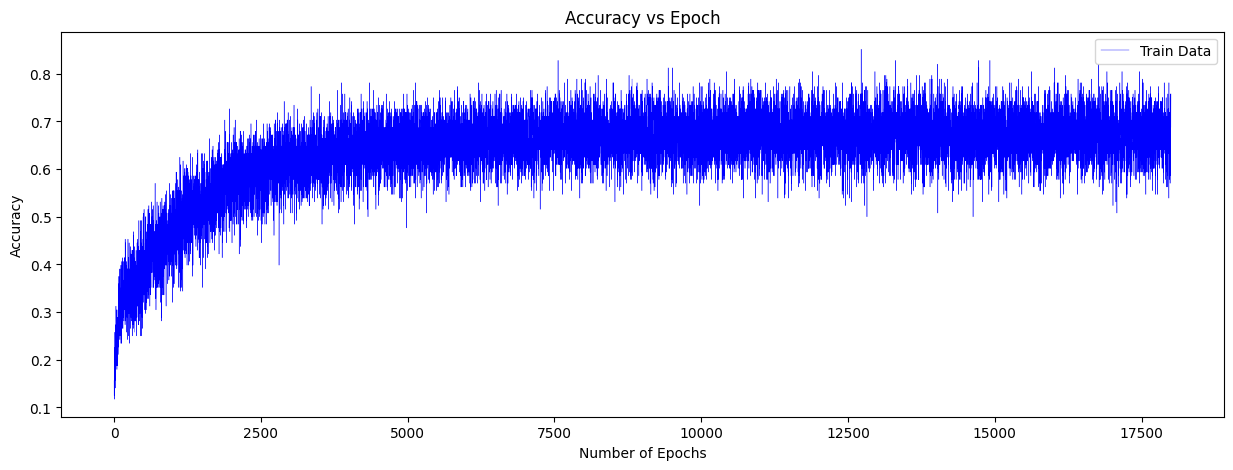

In [9]:
alphabet_mapping = {        # 레이블이 각 알파벳에 대한 순서로 되어 있어
    0: 't',                 # 결과 값 비교를 위한 매핑
    1: 'u',
    2: 'v',
    3: 'w',
    4: 'x',
    5: 'y',
    6: 'z',
}

# 1.정답 결과 / 테스트 결과
test_result = [alphabet_mapping[num] for num in test_out]   # 정답
test_target = [alphabet_mapping[num] for num in Y_test]     # 모델 예측값

for i in range(20): 
   print("expected:", test_target[i], "result:", test_result[i])



# 2. 테스트 데이터셋에 대한 accuracy
test_acc=(test_out==Y_test).mean().item()           
test_accuries = []; test_accuries.append(test_acc)   

print(f'Test accuracy = {test_acc:.4f}')
np.savez('weights', w1, w2)

# 3. Accuracy 변화율 그래프
plt.figure(figsize=(15, 5))
plt.plot(range(len(accuries)),
         accuries, 'b', label='Train Data', linewidth=0.3)
plt.title('Accuracy vs Epoch')
plt.xlabel('Number of Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()